In [5]:
# only run this code if the error exist exactly in these images
'''
import os
from PIL import Image

def delete_invalid_images(root_folder):
    invalid_images = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
                try:
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()
                except Exception as e:
                    invalid_image_path = os.path.join(root, file)
                    invalid_images.append(invalid_image_path)
                    os.remove(invalid_image_path)  # Delete the file
                    print(f"Deleted invalid image: {invalid_image_path}")
    return invalid_images

root_folder = 'data/color/'
delete_invalid_images(root_folder)
'''


Deleted invalid image: data/color/Potato___Early_blight/5a6f3209-223e-43e5-8680-41dd3d5091ce___RS_Early.B 7288.JPG
Deleted invalid image: data/color/Potato___Early_blight/5a7ca2a3-5bfc-47b7-9657-85a6c95a0956___RS_Early.B 7061.JPG
Deleted invalid image: data/color/Potato___Early_blight/5abfa537-636f-41df-a833-311a3018aac9___RS_Early.B 8176.JPG
Deleted invalid image: data/color/Potato___Early_blight/5ada96db-43de-4510-8c10-eaaebb106c0c___RS_Early.B 7216.JPG
Deleted invalid image: data/color/Potato___Early_blight/5aee3e9f-0469-42e7-8ae7-56f7a1900fd5___RS_Early.B 9091.JPG
Deleted invalid image: data/color/Potato___Early_blight/5b361ac7-6fb7-497a-b11d-3b8cd7ffd2e1___RS_Early.B 9206.JPG
Deleted invalid image: data/color/Potato___Late_blight/954d36cb-4a20-4889-83dd-4cba7e7180f8___RS_LB 4536.JPG
Deleted invalid image: data/color/Potato___Late_blight/9570095c-02e9-497b-bec1-4e526f3462e5___RS_LB 2815.JPG
Deleted invalid image: data/color/Potato___Late_blight/95816fab-df6d-4730-8f52-4b64aac47e3d_

['data/color/Potato___Early_blight/5a6f3209-223e-43e5-8680-41dd3d5091ce___RS_Early.B 7288.JPG',
 'data/color/Potato___Early_blight/5a7ca2a3-5bfc-47b7-9657-85a6c95a0956___RS_Early.B 7061.JPG',
 'data/color/Potato___Early_blight/5abfa537-636f-41df-a833-311a3018aac9___RS_Early.B 8176.JPG',
 'data/color/Potato___Early_blight/5ada96db-43de-4510-8c10-eaaebb106c0c___RS_Early.B 7216.JPG',
 'data/color/Potato___Early_blight/5aee3e9f-0469-42e7-8ae7-56f7a1900fd5___RS_Early.B 9091.JPG',
 'data/color/Potato___Early_blight/5b361ac7-6fb7-497a-b11d-3b8cd7ffd2e1___RS_Early.B 9206.JPG',
 'data/color/Potato___Late_blight/954d36cb-4a20-4889-83dd-4cba7e7180f8___RS_LB 4536.JPG',
 'data/color/Potato___Late_blight/9570095c-02e9-497b-bec1-4e526f3462e5___RS_LB 2815.JPG',
 'data/color/Potato___Late_blight/95816fab-df6d-4730-8f52-4b64aac47e3d___RS_LB 3056.JPG',
 'data/color/Potato___Late_blight/958a4438-2ced-4d8c-af73-871376cf6ed5___RS_LB 4483.JPG',
 'data/color/Potato___Late_blight/9631fd8f-244c-4047-98e4-aecc90

In [42]:
import os
import pandas as pd

base_path = "data/color/"

photo_array = []
condition_array = []
disease_array = []
type_of_plant_array = []

for file in os.listdir(base_path):
    if file != ".DS_Store":
        dir_photos = os.listdir(os.path.join(base_path, file))

        # Determine the condition (healthy or not)
        if "healthy" in file:
            condition = 1
        else:
            condition = 0

        # Split the file name to extract disease and type_of_plant information
        split_result = file.split("___")
        if len(split_result) < 2:
            print(f"Error splitting file name: {file}")
            continue

        disease = split_result[1]
        type_of_plant = split_result[0]

        # Iterate through photos in the directory
        for photo in dir_photos:
            
            full_photo_path = os.path.join(base_path, file, photo)
            
            condition_array.append(condition)
            disease_array.append(disease)
            photo_array.append(full_photo_path)
            type_of_plant_array.append(type_of_plant)

df = pd.DataFrame({
    'Photo': photo_array,
    'Disease': disease_array,
    'Type of Plant': type_of_plant_array,
    'Condition': condition_array
})

df.head()

,Photo,Disease,Type of Plant,Condition
0,data/color/Apple___Apple_scab/00075aa8-d81a-41...,Apple_scab,Apple,0
1,data/color/Apple___Apple_scab/01a66316-0e98-4d...,Apple_scab,Apple,0
2,data/color/Apple___Apple_scab/01f3deaa-6143-4b...,Apple_scab,Apple,0
3,data/color/Apple___Apple_scab/0208f4eb-45a4-43...,Apple_scab,Apple,0
4,data/color/Apple___Apple_scab/023123cb-7b69-4c...,Apple_scab,Apple,0


In [43]:
print(df.dtypes)
df.count()

Photo            object
Disease          object
Type of Plant    object
Condition         int64
dtype: object


Photo            54287
Disease          54287
Type of Plant    54287
Condition        54287
dtype: int64

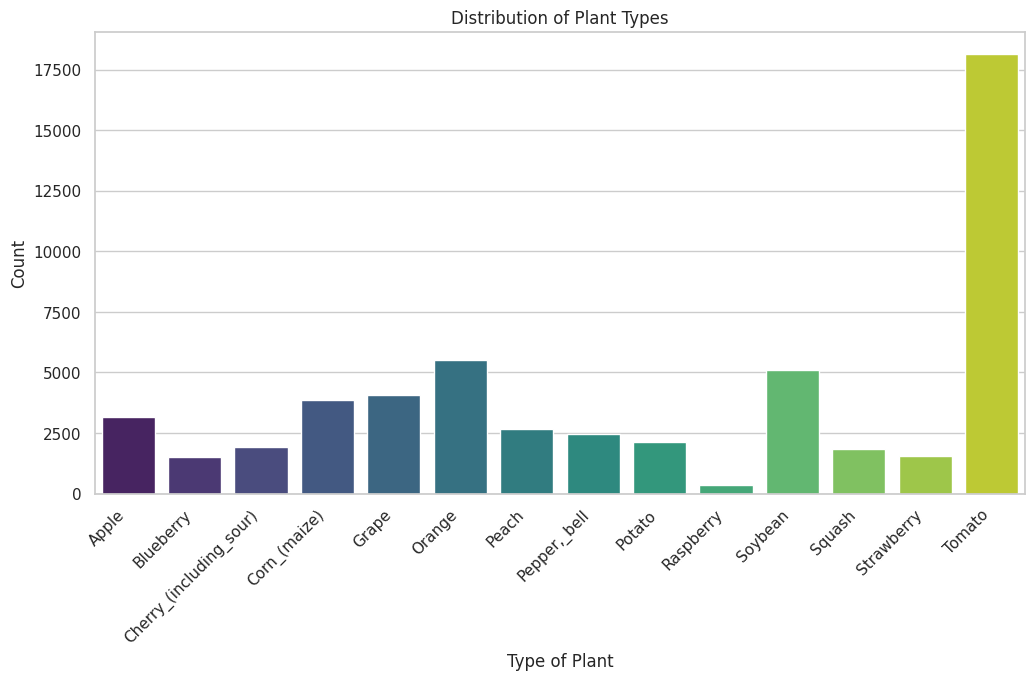

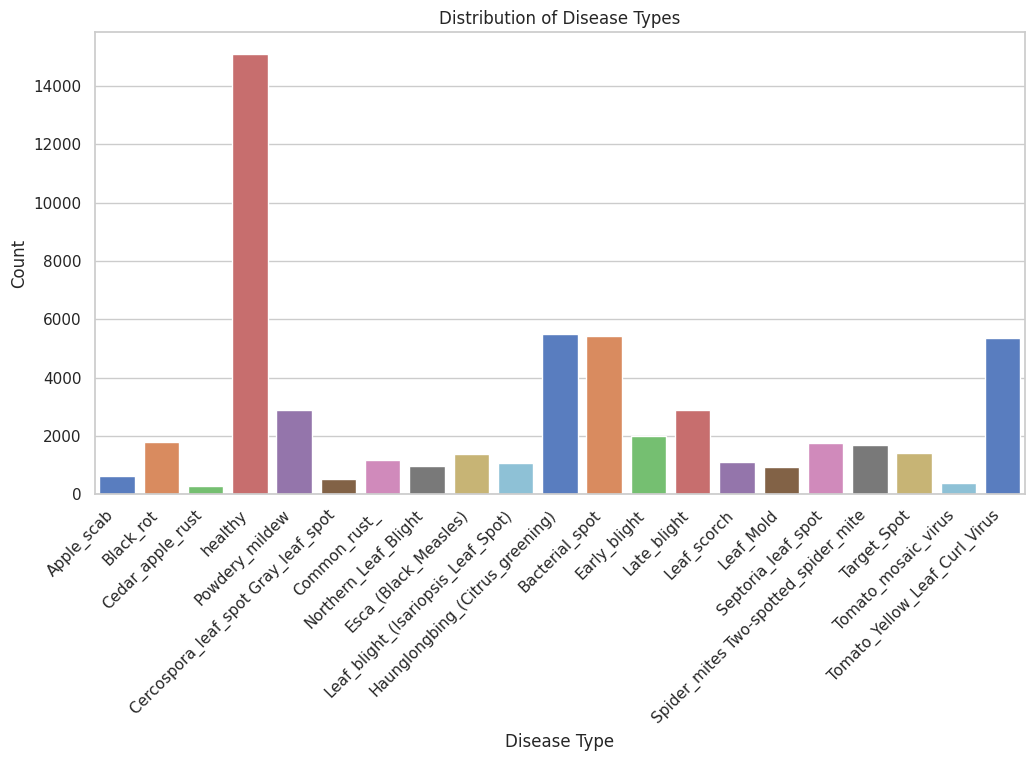

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.countplot(x='Type of Plant', data=df, palette='viridis')
plt.title('Distribution of Plant Types')
plt.xlabel('Type of Plant')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='Disease', data=df, palette='muted')
plt.title('Distribution of Disease Types')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [45]:
df.head()

,Photo,Disease,Type of Plant,Condition
0,data/color/Apple___Apple_scab/00075aa8-d81a-41...,Apple_scab,Apple,0
1,data/color/Apple___Apple_scab/01a66316-0e98-4d...,Apple_scab,Apple,0
2,data/color/Apple___Apple_scab/01f3deaa-6143-4b...,Apple_scab,Apple,0
3,data/color/Apple___Apple_scab/0208f4eb-45a4-43...,Apple_scab,Apple,0
4,data/color/Apple___Apple_scab/023123cb-7b69-4c...,Apple_scab,Apple,0


In [46]:
shuffled = df.sample(frac=1, random_state=123).reset_index(drop=True)

subset = shuffled.head(54287)

train_set = subset.head(40000)
test_set = subset.tail(14287)

In [47]:
train_set.loc[:, 'Condition'] = train_set['Condition'].copy()
test_set.loc[:, 'Condition'] = test_set['Condition'].copy()

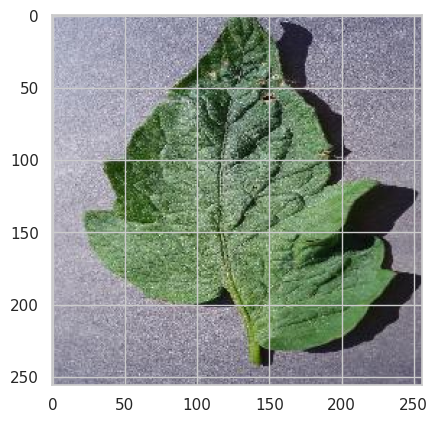

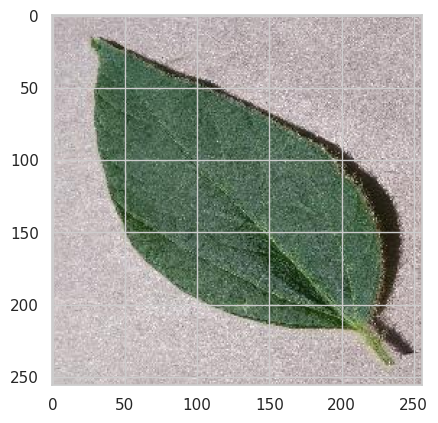

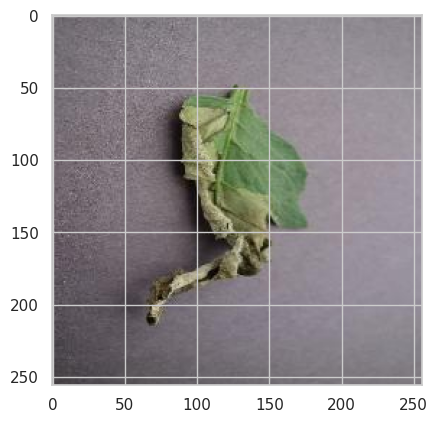

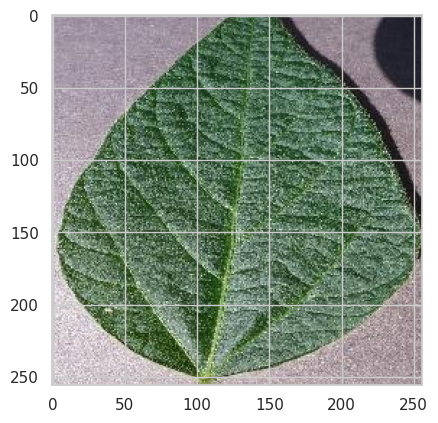

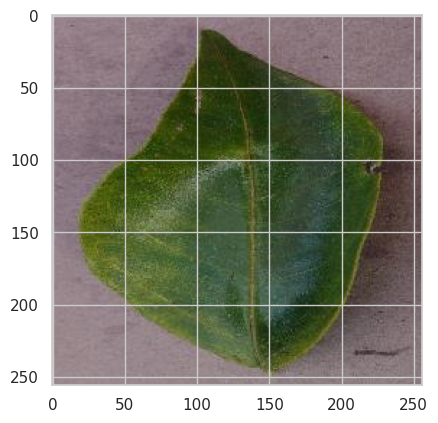

In [48]:
X_train_list = list(train_set['Photo'])
X_test_list = list(test_set['Photo'])

y_train_list = list(train_set['Condition'])
y_test_list = list(test_set['Condition'])

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(5):
    img_path = X_train_list[i]
    img = mpimg.imread(img_path)
    
    plt.imshow(img)
    plt.show()

In [49]:
import tensorflow as tf

def parse(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.io.decode_jpeg(image_string, channels=3)    
    return image_decoded, label

train_data = tf.data.Dataset.from_tensor_slices((X_train_list, y_train_list))
train_data = train_data.map(parse).batch(100)

test_data = tf.data.Dataset.from_tensor_slices((X_test_list, y_test_list))
test_data = test_data.map(parse).batch(100)

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # Two neurons for binary classification

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 246016)            0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [51]:
from tensorflow.keras import optimizers

learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
plant_model = model.fit(train_data, epochs=10, validation_data=test_data)
test_loss, test_acc = model.evaluate(test_data)

print(f"Test Accuracy: {test_acc}")

Epoch 1/10
400/400 [==============================] - 74s 182ms/step - loss: 42.4696 - accuracy: 0.7964 - val_loss: 0.4041 - val_accuracy: 0.8162
Epoch 2/10
400/400 [==============================] - 97s 241ms/step - loss: 0.2626 - accuracy: 0.8923 - val_loss: 0.3202 - val_accuracy: 0.8753
Epoch 3/10
400/400 [==============================] - 80s 200ms/step - loss: 0.1716 - accuracy: 0.9384 - val_loss: 0.6368 - val_accuracy: 0.7617
Epoch 4/10
400/400 [==============================] - 74s 185ms/step - loss: 0.1749 - accuracy: 0.9356 - val_loss: 0.5944 - val_accuracy: 0.8188
Epoch 5/10
400/400 [==============================] - 80s 200ms/step - loss: 0.1314 - accuracy: 0.9557 - val_loss: 0.5384 - val_accuracy: 0.8590
Epoch 6/10
400/400 [==============================] - 112s 281ms/step - loss: 0.0740 - accuracy: 0.9783 - val_loss: 0.6558 - val_accuracy: 0.8471
Epoch 7/10
400/400 [==============================] - 96s 240ms/step - loss: 0.0560 - accuracy: 0.9843 - val_loss: 0.5533 - val_